In [20]:
# WiseJourney
print('WiseJourney','\N{TRADE MARK SIGN}')

WiseJourney ™


In [ ]:
img = Image.open("WJ_Logo_email.jpeg")
display(img)

Saved file: galaxy.png


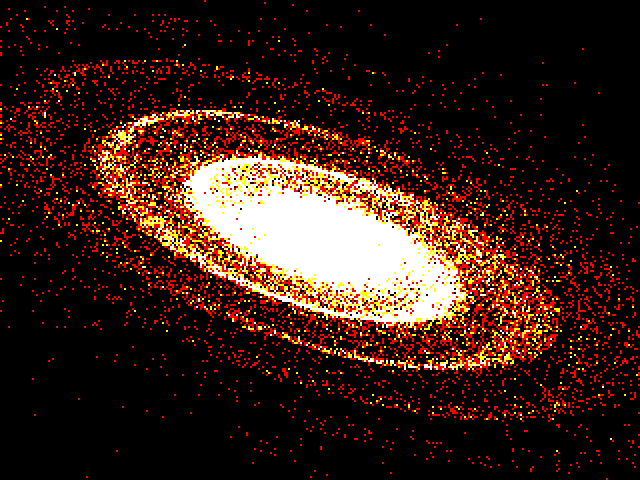

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import random
import math
import numpy as np
from PIL import Image
from google.colab import files
from IPython.display import Image as IPyImage, display

def generate_spiral_galaxy(
    width: int = 640,
    height: int = 480,
    num_points: int = 100000,
    output_path: str = "galaxy.png"
) -> str:
    """
    Reproduce the “spiral galaxy” exactly as in the QB64 screenshot,
    but fix the horizontal line artifact by assigning z = (RND – 0.5) directly.
    """
    # 1) Create a hit‐count map and a blank RGB canvas
    pxmap = np.zeros((height, width), dtype=np.int8)
    img   = np.zeros((height, width, 3), dtype=np.uint8)

    # 2) Define the four colors (coul(0..3) in QB64):
    colors = [
        (  0,   0,   0),   # black
        (255,   0,   0),   # red
        (255, 255,   0),   # yellow
        (255, 255, 255)    # white
    ]

    for _ in range(num_points):
        #  • s = LOG(RND)
        s = math.log(random.random())

        #  • t = 300 * RND
        t = 300.0 * random.random()

        #  • u = 60 * s * SIN(t),  v = 50 * s * COS(t)
        u = 60.0 * s * math.sin(t)
        v = 50.0 * s * math.cos(t)

        #  • p = 3 * s;  c = COS(p);  s2 = SIN(p)
        p  = 3.0 * s
        c  = math.cos(p)
        s2 = math.sin(p)

        #  • x = u*c + v*s2;  y = –u*s2 + v*c   (rotate by angle p)
        x = u * c + v * s2
        y = -u * s2 + v * c

        #  • r = x^2 + y^2
        r = x*x + y*y

        #  • z = (RND – 0.5)   ← THIS IS THE FIX (no longer multiplying by 80*exp(...))
        z = (random.random() - 0.5)

        #  • rnd_int = INT(RND * 20 + 1)
        rnd_int = random.randint(1, 20)

        #  • x = x + z * (x * 0.3 + rnd_int)
        x = x + z * (x * 0.3 + rnd_int)

        #  • xx = 2 * INT(160 + x*0.7 + y*0.3)
        xx = int(2 * int(160.0 + x * 0.7 + y * 0.3))

        #  • yy = 2 * INT(120 + x*0.1 + y*0.4)
        yy = int(2 * int(120.0 + x * 0.1 + y * 0.4))

        #  • IF xx>0 AND xx<640 AND yy>0 AND yy<480 THEN …
        if 0 <= xx < width and 0 <= yy < height:
            col = pxmap[yy, xx]
            if col < 3:
                col += 1
            pxmap[yy, xx] = col

            #  • LINE (xx,yy)-(xx+1,yy+1), coul(col), BF  (draw a 2×2 square)
            if xx + 1 < width and yy + 1 < height:
                img[yy:yy+2, xx:xx+2] = colors[col]
            else:
                img[yy, xx] = colors[col]

    # Save out as PNG
    Image.fromarray(img).save(output_path)
    return output_path

# Generate the galaxy, save as "galaxy.png"
filename = generate_spiral_galaxy()
print("Saved file:", filename)

# Display inline
display(IPyImage(filename=filename))

# Prompt browser to download
files.download(filename)


In [18]:
print('WiseJourney','\N{TRADE MARK SIGN}')
print('Author: Marcel Ferran Castro Ponce de Leon')
print('Date: Jun, 05th, 2025')
print('Version: 1')

WiseJourney ™
Author: Marcel Ferran Castro Ponce de Leon
Date: Jun, 05th, 2025
Version: 1
